### Scikit-image to read, save images and some basic analysis ###

conda install scikit-image

In [1]:
from skimage import io

from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Read in an image: jpeg or png file

image = io.imread('colors.jpg') # allows you to read in an image file
print(f"Image is of type: {type(image)}\n\nThis image has a shape: {image.shape}") # shape is the dimensions of the image

Image is of type: <class 'numpy.ndarray'>

This image has a shape: (183, 275, 3)


The shape indicates the image has 183 rows x 275 columns of pixels in 3 channels (RGB in this case).

In [4]:
print(f"Image contains pixel values which range from 0 to 255:\n {image}") # Content of the read in image

Image contains pixel values which range from 0 to 255:
 [[[204  31 146]
  [216  39 156]
  [231  45 168]
  ...
  [ 91 100  97]
  [ 91 100  97]
  [ 91 100  97]]

 [[222  39 157]
  [228  40 160]
  [235  41 164]
  ...
  [ 10  19  16]
  [ 10  19  16]
  [ 10  19  16]]

 [[226  27 146]
  [229  27 149]
  [232  28 151]
  ...
  [ 40  49  44]
  [ 40  49  44]
  [ 40  49  44]]

 ...

 [[ 45  32  24]
  [ 78  63  56]
  [117  98  91]
  ...
  [ 72 116 153]
  [ 75 119 156]
  [ 78 122 159]]

 [[115  96  89]
  [111  91  82]
  [110  86  76]
  ...
  [ 45  99 143]
  [ 53 107 151]
  [ 61 115 159]]

 [[121  98  90]
  [120  96  86]
  [112  84  73]
  ...
  [ 61 122 167]
  [ 60 121 166]
  [ 57 118 163]]]


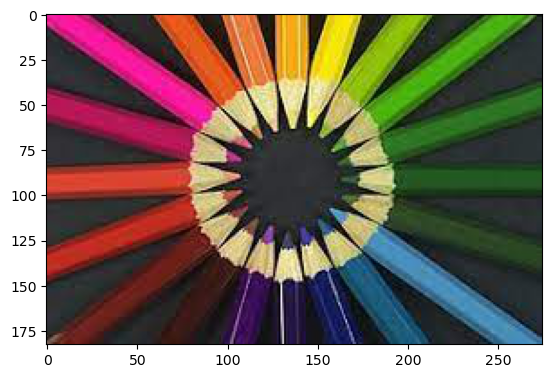

In [5]:
# Let us plot the image
plt.imshow(image) # Display the image
plt.show() # Show the image

As you can see the x-axis is counted from 0 to 275 and the y-axis is from 183 to 0.

In [6]:
# We can normalize this image

img_normalized = image /255 # since 255 is the largest pixel value, we can normalize the image by dividing by 255
print(f"The image has the largest pixel value of 255 and we can normalize the image data by dividing by 255:\n{img_normalized}")
io.imsave('collors.png',image) # We can save an image if we want as a .png file too

The image has the largest pixel value of 255 and we can normalize the image data by dividing by 255:
[[[0.8        0.12156863 0.57254902]
  [0.84705882 0.15294118 0.61176471]
  [0.90588235 0.17647059 0.65882353]
  ...
  [0.35686275 0.39215686 0.38039216]
  [0.35686275 0.39215686 0.38039216]
  [0.35686275 0.39215686 0.38039216]]

 [[0.87058824 0.15294118 0.61568627]
  [0.89411765 0.15686275 0.62745098]
  [0.92156863 0.16078431 0.64313725]
  ...
  [0.03921569 0.0745098  0.0627451 ]
  [0.03921569 0.0745098  0.0627451 ]
  [0.03921569 0.0745098  0.0627451 ]]

 [[0.88627451 0.10588235 0.57254902]
  [0.89803922 0.10588235 0.58431373]
  [0.90980392 0.10980392 0.59215686]
  ...
  [0.15686275 0.19215686 0.17254902]
  [0.15686275 0.19215686 0.17254902]
  [0.15686275 0.19215686 0.17254902]]

 ...

 [[0.17647059 0.1254902  0.09411765]
  [0.30588235 0.24705882 0.21960784]
  [0.45882353 0.38431373 0.35686275]
  ...
  [0.28235294 0.45490196 0.6       ]
  [0.29411765 0.46666667 0.61176471]
  [0.3058823

In [7]:
# We can reshape the image such that the RGB channels are in 3 columns
pixels_per_channel = image.shape[0] * image.shape[1] # Get the number of pixels per channel
print(f"{pixels_per_channel} pixels per channel") # Number of pixels per channel

# Reshape the normalized image such that each column represents one channel
reshaped_image = img_normalized.reshape(pixels_per_channel,3) # Reshape the image
print(reshaped_image, reshaped_image.shape) # Display the reshaped image

50325 pixels per channel
[[0.8        0.12156863 0.57254902]
 [0.84705882 0.15294118 0.61176471]
 [0.90588235 0.17647059 0.65882353]
 ...
 [0.23921569 0.47843137 0.65490196]
 [0.23529412 0.4745098  0.65098039]
 [0.22352941 0.4627451  0.63921569]] (50325, 3)


#### Let us say we want to compress this image by reducing the number of shades of colors in this image to just 4 shades: ####

    - We could apply kmeans on this reshaped image with k=4 and it would create 4 centroids which represent the 4 shades we are looking for as an average.
    
    - We would then get the 4 cluster centers and the cluster labels for each row of data determining which cluster, among 0 to 3, the row belongs too. 
    
    - Now, we can simply create a new image, replacing the RGB pixel information of each row with the cluster centroid value of the cluster it belongs to. Those are the average colors being given to each pixel.
    
    - Finally we should reshape the data back to the original shape (183,275,3) and we would have reduced the number of colors in that image.
